## Application and implications

#### Generating creative images using OpenAI DALL-E.

In [ ]:
!pip install openai pillow

Execute the code cell below and enter your OpenAI API key. If you do not have an OpenAI API Key you can sign-up [here](https://platform.openai.com) to get one.

In [9]:
import getpass
open_ai_key = getpass.getpass(prompt='Enter OpenAI API Key: ')

Import the required dependencies and initialize an OpenAI Client with the API Key.

In [10]:
# imports
from openai import OpenAI  # OpenAI Python library to make API calls
import requests  # used to download images
import os  # used to access filepaths
from PIL import Image  # used to print and edit images

# initialize OpenAI client
client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY", open_ai_key))


Create an `/images` directory.

In [11]:
# set a directory to save DALL·E images to
image_dir_name = "images"
image_dir = os.path.join(os.curdir, image_dir_name)

# create the directory if it doesn't yet exist
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

# print the directory to save to
print(f"{image_dir=}")


image_dir='./images'


Invoke the DALL-E model with our prompt

_A futuristic city with flying cars and tall futuristic buildings, with blue sky in the background and robots going about their day._

In [13]:
# create an image

# set the prompt
prompt = "A futuristic city with flying cars and tall futuristic buildings, with blue sky in the background and robots going about their day."

# call the OpenAI API
generation_response = client.images.generate(
    model = "dall-e-3",
    prompt=prompt,
    n=1,
    size="1024x1024",
    response_format="url",
)

# print response
print(generation_response)

ImagesResponse(created=1714101393, data=[Image(b64_json=None, revised_prompt='Generate an image of a forward-looking cityscape in the future filled with flying vehicles maneuvering around towering innovative architectural structures. The backdrop is adorned with a serene blue sky. A variety of robots of different shapes and sizes can be seen engaging in daily activities, adding a touch of lively mechanical life to the scene.', url='https://oaidalleapiprodscus.blob.core.windows.net/private/org-I7zGLBNKAcQ6P7lLBgMVev0X/user-OCdp0rgHrSjVm9GcvN2tshJY/img-YJCENrhedlvnDPKI1atRKpk5.png?st=2024-04-26T02%3A16%3A33Z&se=2024-04-26T04%3A16%3A33Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-04-25T19%3A15%3A11Z&ske=2024-04-26T19%3A15%3A11Z&sks=b&skv=2021-08-06&sig=TluUiVK6vtsjnWJy/6zPLbj8GTJLb24V2xP2e1Pq/y4%3D')])


Display the generated image using Pillow library.

./images/generated_image.png


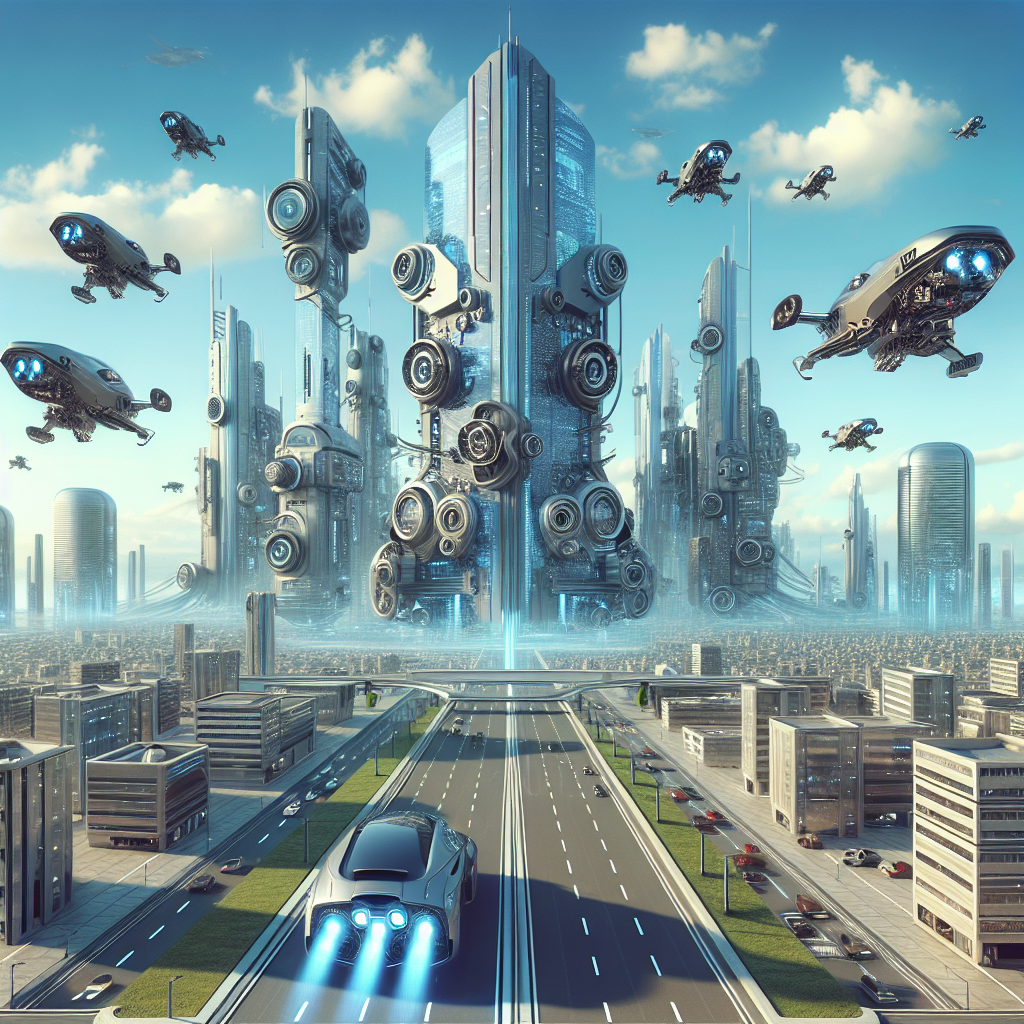

In [14]:
# save the image
generated_image_name = "generated_image.png"  # any name you like; the filetype should be .png
generated_image_filepath = os.path.join(image_dir, generated_image_name)
generated_image_url = generation_response.data[0].url  # extract image URL from response
generated_image = requests.get(generated_image_url).content  # download the image

with open(generated_image_filepath, "wb") as image_file:
    image_file.write(generated_image)  # write the image to the file

# print the image
print(generated_image_filepath)
display(Image.open(generated_image_filepath))


#### Math problems with Google Flan-T5

We will use [Flan-T5](https://huggingface.co/google/flan-t5-base) open source model available via [Hugging Face Hub](https://huggingface.co/models). 

Note that since Flan-T5 is an open-source model, you can also download and use it in your own compute environment for generative AI applications. However, details about how to do that is out of scope of this book. Alternatively, we will access the model directly via Hugging Face hub, but note that this method is only for experimentation and learning purposes. Please see Hugging Face policies for more details.

In [ ]:
!pip install 'transformers[torch]' sentencepiece

In [5]:

from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-base")

input_text = "What is the result of 2345 minus 432?"
input_ids = tokenizer(input_text, return_tensors="pt").input_ids

outputs = model.generate(input_ids, max_new_tokens=200)
print(tokenizer.decode(outputs[0]))


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


<pad> -29</s>
